<a href="https://colab.research.google.com/github/sravaniberam/redwine/blob/main/redwinequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# **Loading Dataset**

In [3]:
dataset = pd.read_csv("winequality-red.csv")
print(dataset.shape)

(1596, 12)


In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Missing Values**

In [5]:
print(dataset.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# **Exploring Data**

In [6]:
fig = px.histogram(dataset, x="quality")
fig.show()

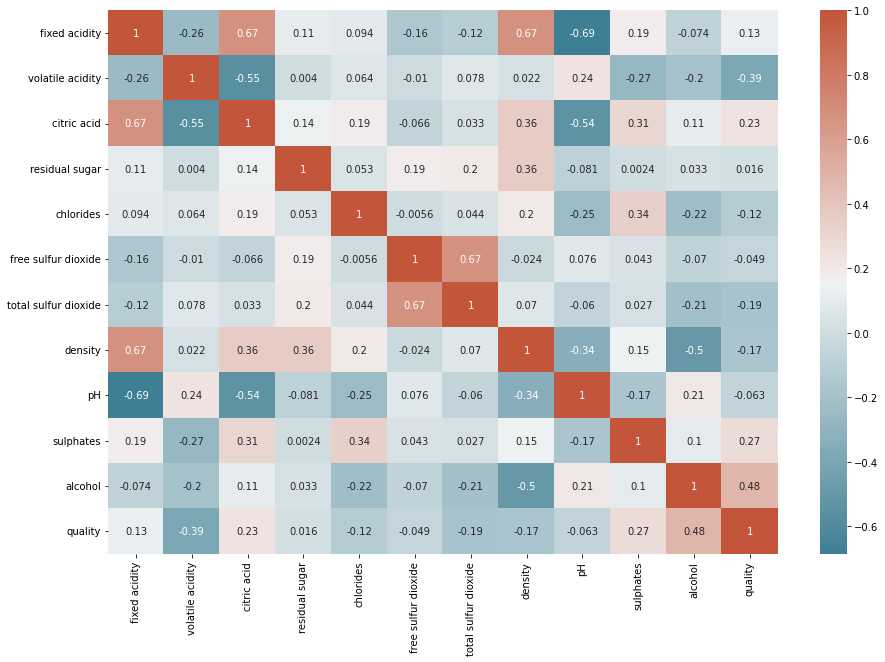

In [7]:
corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [8]:
dataset['goodquality'] = [1 if x>=7 else 0 for x in dataset['quality']]

In [9]:
print(dataset)

      fixed acidity  volatile acidity  ...  quality  goodquality
0               7.4             0.700  ...        5            0
1               7.8             0.880  ...        5            0
2               7.8             0.760  ...        5            0
3              11.2             0.280  ...        6            0
4               7.4             0.700  ...        5            0
...             ...               ...  ...      ...          ...
1591            6.2             0.600  ...        5            0
1592            5.9             0.550  ...        6            0
1593            6.3             0.510  ...        6            0
1594            5.9             0.645  ...        5            0
1595            6.0             0.310  ...        6            0

[1596 rows x 13 columns]


In [10]:
print(dataset['goodquality'])

0       0
1       0
2       0
3       0
4       0
       ..
1591    0
1592    0
1593    0
1594    0
1595    0
Name: goodquality, Length: 1596, dtype: int64


In [11]:
X = dataset.iloc[:,:-2]
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1591            6.2             0.600         0.08  ...  3.45       0.58     10.5
1592            5.9             0.550         0.10  ...  3.52       0.76     11.2
1593            6.3             0.510         0.13  ...  3.42       0.75     11.0
1594            5.9             0.645         0.12  ...  3.57       0.71     10.2
1595            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1596 rows x 11

In [12]:
y = dataset.iloc[:,-1]
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1591    0
1592    0
1593    0
1594    0
1595    0
Name: goodquality, Length: 1596, dtype: int64


In [13]:
dataset['goodquality'].value_counts()

0    1379
1     217
Name: goodquality, dtype: int64

# **Feature Scaling and Splitting**

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [16]:
print(y_train)

1227    0
140     0
1378    0
720     0
77      0
       ..
763     0
835     1
1216    0
559     0
684     0
Name: goodquality, Length: 1197, dtype: int64


# **Decision Tree**

In [17]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred1 = model1.predict(X_test)
score1 = classification_report(y_test, y_pred1)
print(score1)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       345
           1       0.48      0.52      0.50        54

    accuracy                           0.86       399
   macro avg       0.70      0.72      0.71       399
weighted avg       0.86      0.86      0.86       399



In [19]:
print(confusion_matrix(y_test, y_pred1))

[[315  30]
 [ 26  28]]


# **Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [21]:
y_pred2 = model2.predict(X_test)
score2 = classification_report(y_test, y_pred2)
print(score2)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       345
           1       0.70      0.43      0.53        54

    accuracy                           0.90       399
   macro avg       0.81      0.70      0.74       399
weighted avg       0.89      0.90      0.89       399



In [22]:
print(confusion_matrix(y_test, y_pred2))

[[335  10]
 [ 31  23]]


# **Gradient Boosting**

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(random_state=1)
model3.fit(X_train, y_train)


GradientBoostingClassifier(random_state=1)

In [24]:
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       345
           1       0.55      0.41      0.47        54

    accuracy                           0.87       399
   macro avg       0.73      0.68      0.70       399
weighted avg       0.86      0.87      0.87       399

[[327  18]
 [ 32  22]]


# **XG Boost**

In [25]:
import xgboost as xgb
model4 = xgb.XGBClassifier(random_state=1)
model4.fit(X_train, y_train)


XGBClassifier(random_state=1)

In [26]:
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       345
           1       0.62      0.43      0.51        54

    accuracy                           0.89       399
   macro avg       0.77      0.69      0.72       399
weighted avg       0.87      0.89      0.88       399

[[331  14]
 [ 31  23]]
